In [ ]:
import os
import pandas as pd
data = pd.read_csv('data_autism.csv')

In [ ]:
pip install bayesian-optimization

In [ ]:
data

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,700,0,1,0,1,1,0,1,1,1,1,25,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,701,1,0,0,0,0,0,0,1,0,1,34,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,702,1,0,1,1,1,0,1,1,0,1,24,f,?,no,no,Russia,no,7,18 and more,?,YES
702,703,1,0,0,1,1,0,1,0,1,1,35,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO


In [ ]:
data.drop(['id','used_app_before','age_desc'],axis = 1,inplace = True)

In [ ]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [ ]:
data.shape

(704, 19)

In [ ]:
columns = data.columns

In [ ]:
columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result', 'relation',
       'Class/ASD'],
      dtype='object')

In [ ]:
data.isnull().sum()

A1_Score         0
A2_Score         0
A3_Score         0
A4_Score         0
A5_Score         0
A6_Score         0
A7_Score         0
A8_Score         0
A9_Score         0
A10_Score        0
age              0
gender           0
ethnicity        0
jundice          0
austim           0
contry_of_res    0
result           0
relation         0
Class/ASD        0
dtype: int64

In [ ]:
data[data['ethnicity'] == '?'].shape

(95, 19)

In [ ]:
data[data['relation'] == '?'].shape

(95, 19)

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values='?', strategy='most_frequent')
data = pd.DataFrame(imp.fit_transform(data),columns = columns)

In [ ]:
data[data['ethnicity'] == '?'].shape

(0, 19)

In [ ]:
data[data['relation'] == '?'].shape

(0, 19)

In [ ]:
data['Class/ASD'].unique()

array(['NO', 'YES'], dtype=object)

In [ ]:
data['Class/ASD'].replace(['NO', 'YES'],[0,1],inplace = True)

In [ ]:
data['Class/ASD'].unique()

array([0, 1])

In [ ]:
data['gender'].replace(['f', 'm'],[0,1],inplace = True)

In [ ]:
data['jundice'].replace(['no', 'yes'],[0,1],inplace = True)

In [ ]:
data['austim'].replace(['no', 'yes'],[0,1],inplace = True)

In [ ]:
#data['relation'].replace(['self', 'Parent'],[0,1],inplace = True)

In [ ]:
data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,0,White-European,0,0,United States,6,Self,0
1,1,1,0,1,0,0,0,1,0,1,24,1,Latino,0,1,Brazil,5,Self,0
2,1,1,0,1,1,0,1,1,1,1,27,1,Latino,1,1,Spain,8,Parent,1
3,1,1,0,1,0,0,1,1,0,1,35,0,White-European,0,1,United States,6,Self,0
4,1,0,0,0,0,0,0,1,0,0,40,0,White-European,0,0,Egypt,2,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25,0,White-European,0,0,Russia,7,Self,1
700,1,0,0,0,0,0,0,1,0,1,34,1,Hispanic,0,0,Mexico,3,Parent,0
701,1,0,1,1,1,0,1,1,0,1,24,0,White-European,0,0,Russia,7,Self,1
702,1,0,0,1,1,0,1,0,1,1,35,1,South Asian,0,0,Pakistan,6,Self,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_e(e):
    plt.figure(figsize=(15,6))
    sns.countplot(x='contry_of_res',data=data[data['ethnicity']==e],order=data[data['ethnicity']==e]['contry_of_res'].value_counts().index[:10],palette='viridis')
    plt.title(f'Positive ASD of {e} Ethnicities country wise distribution')
    plt.xlabel('Countries')
    plt.tight_layout()

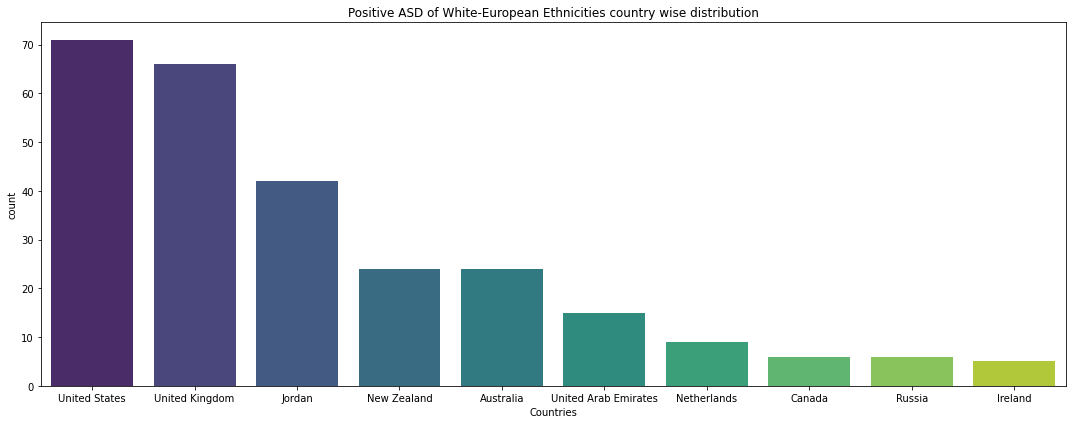

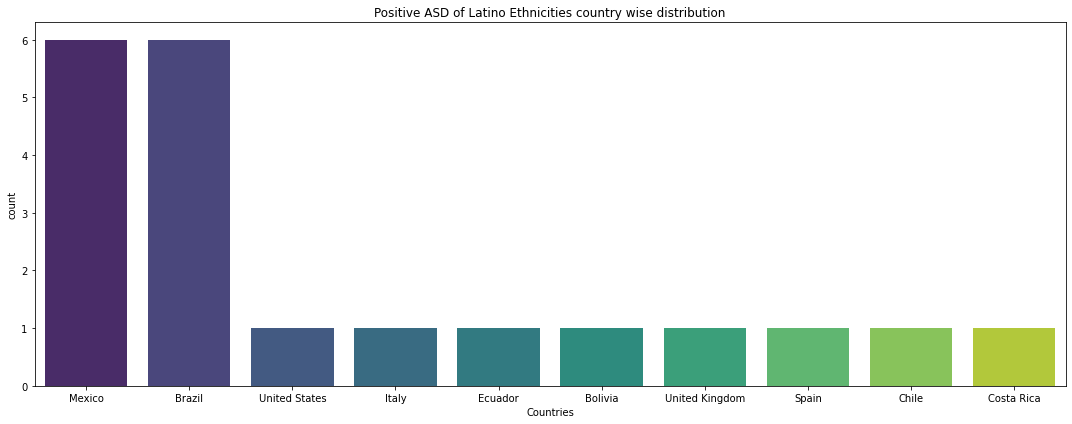

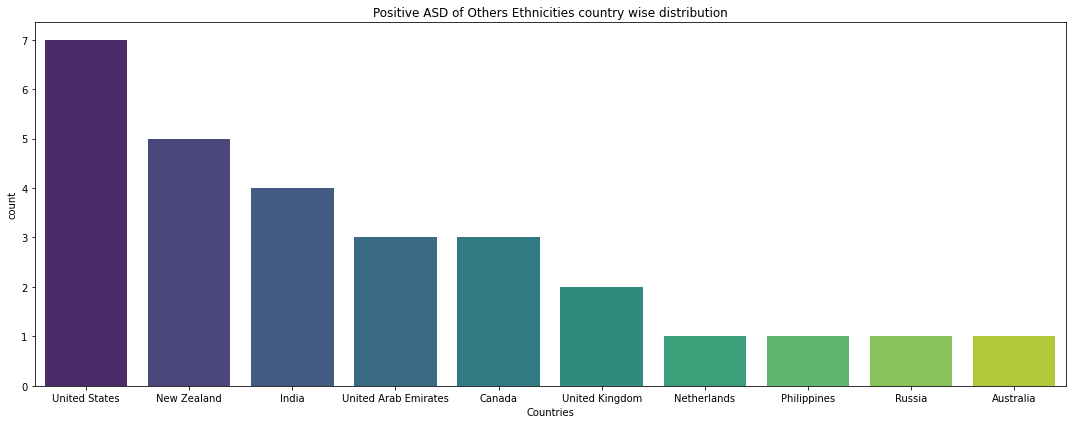

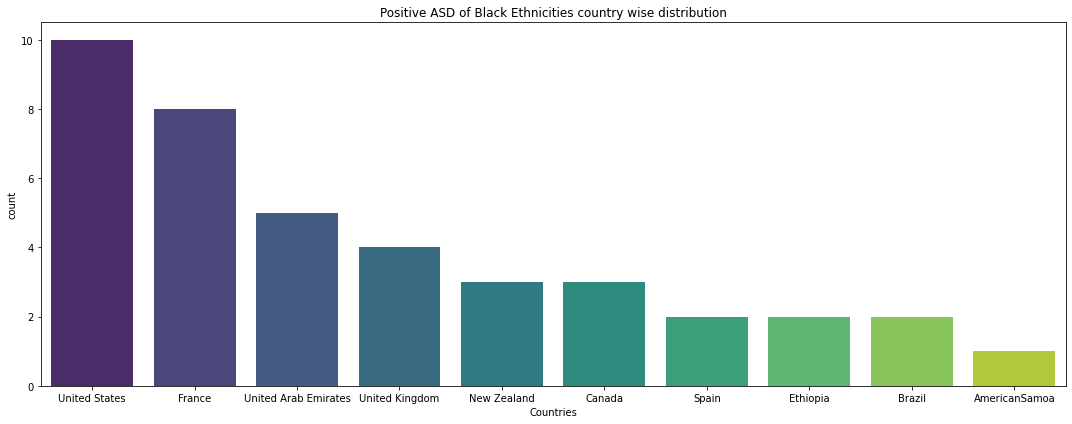

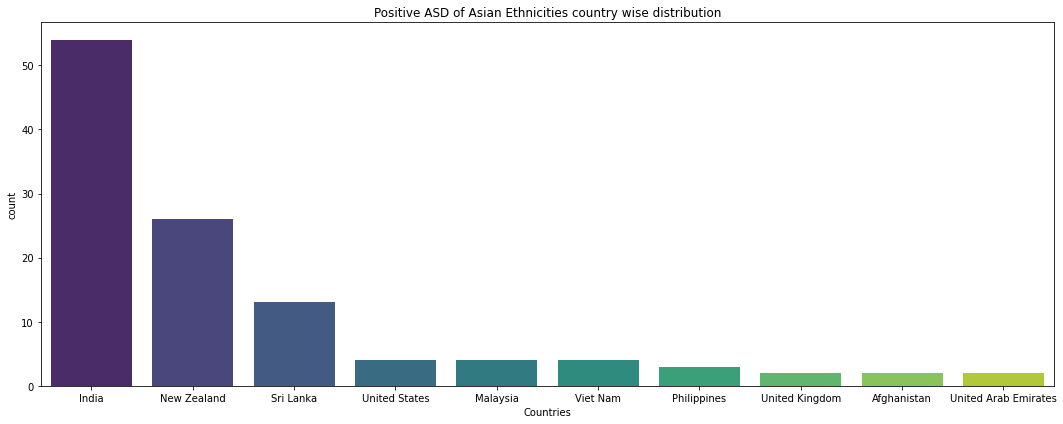

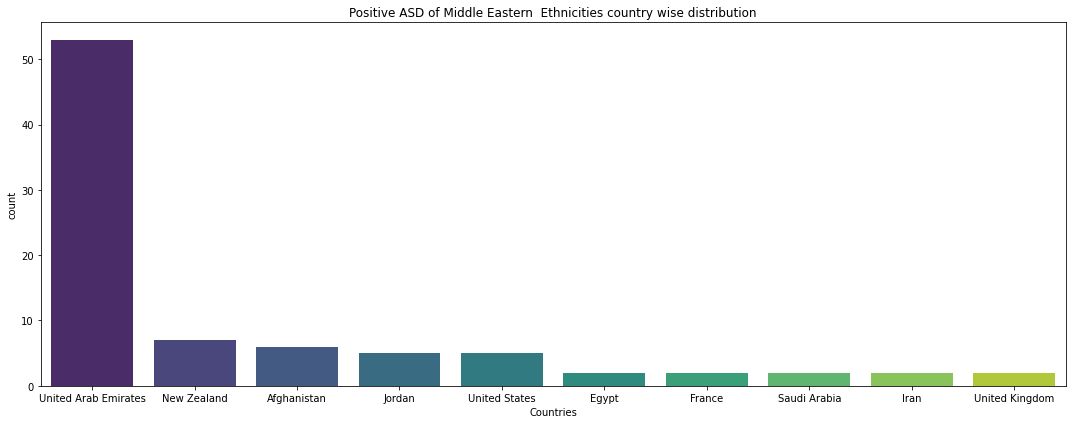

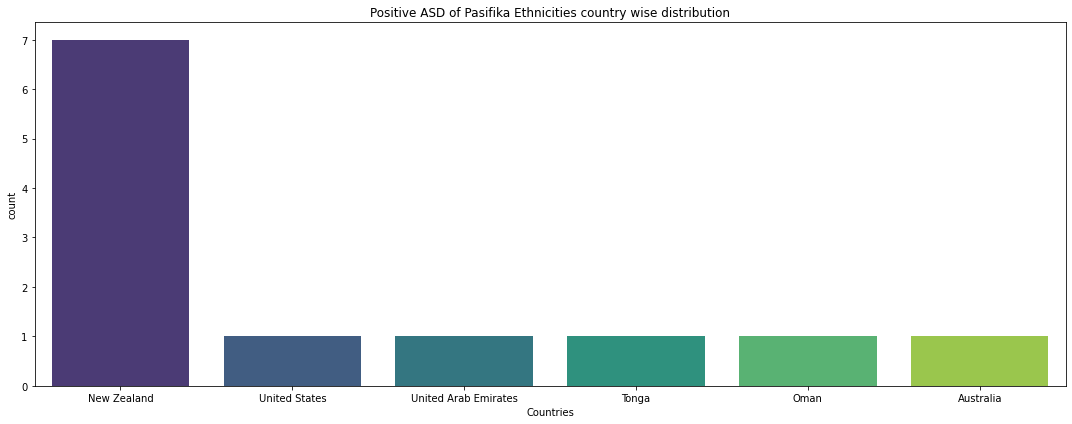

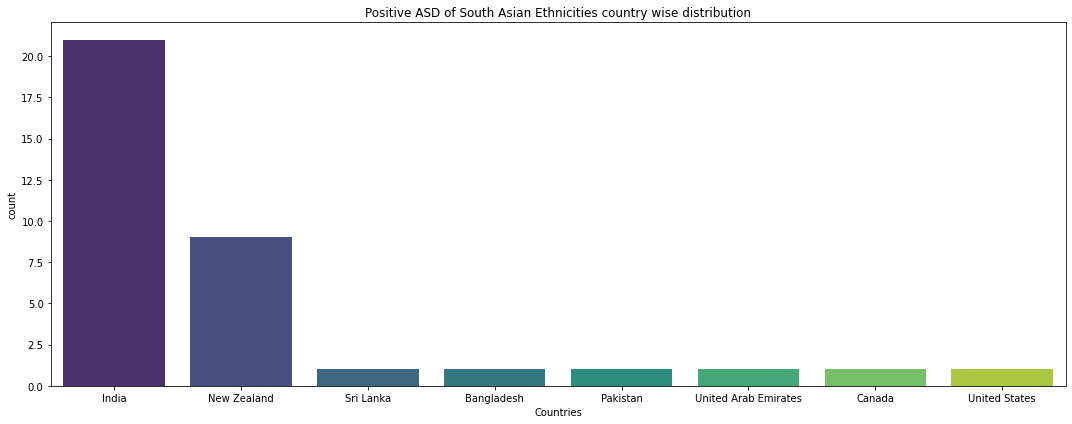

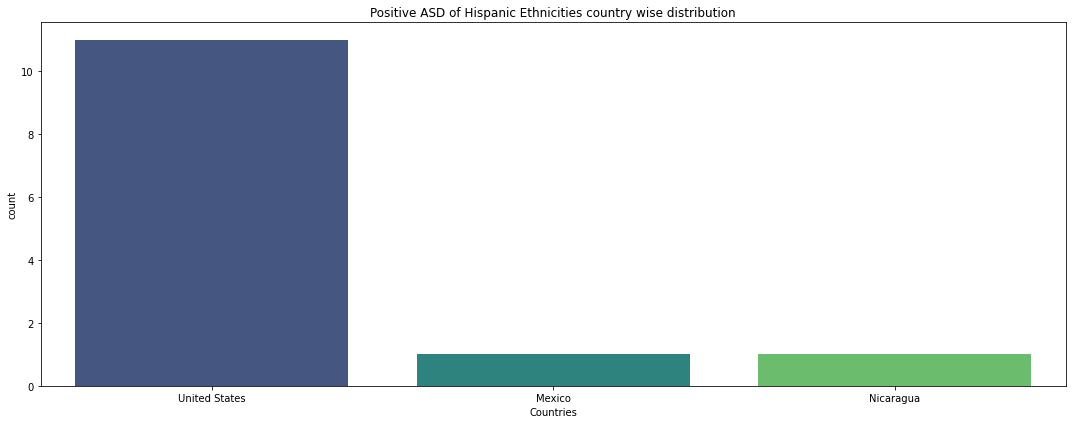

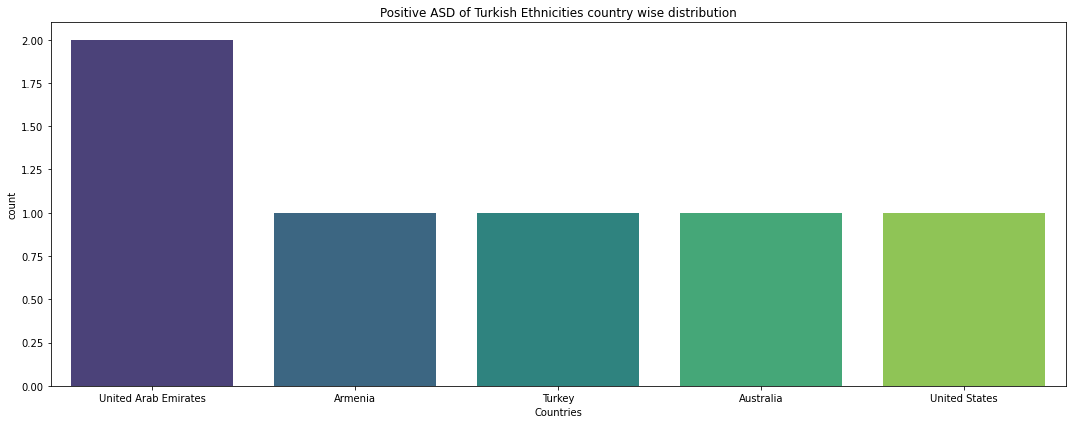

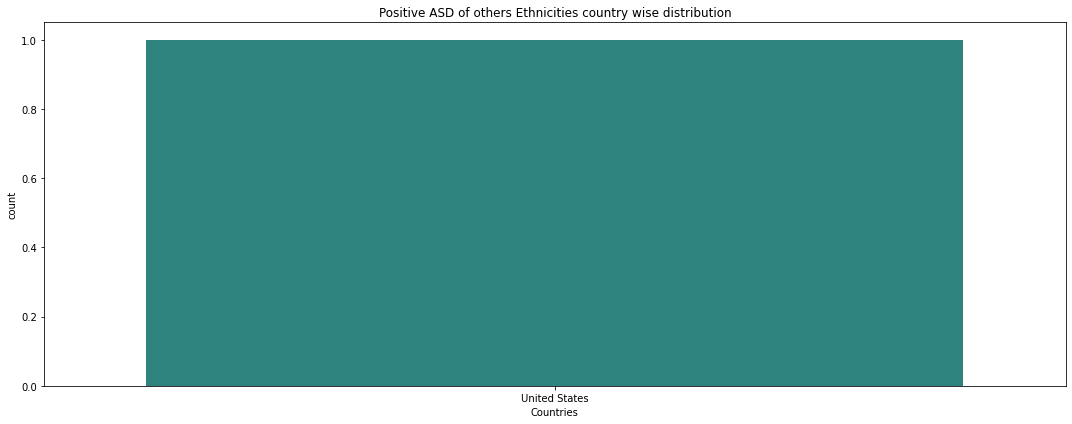

In [ ]:
for i in data['ethnicity'].unique():
    plot_e(i)

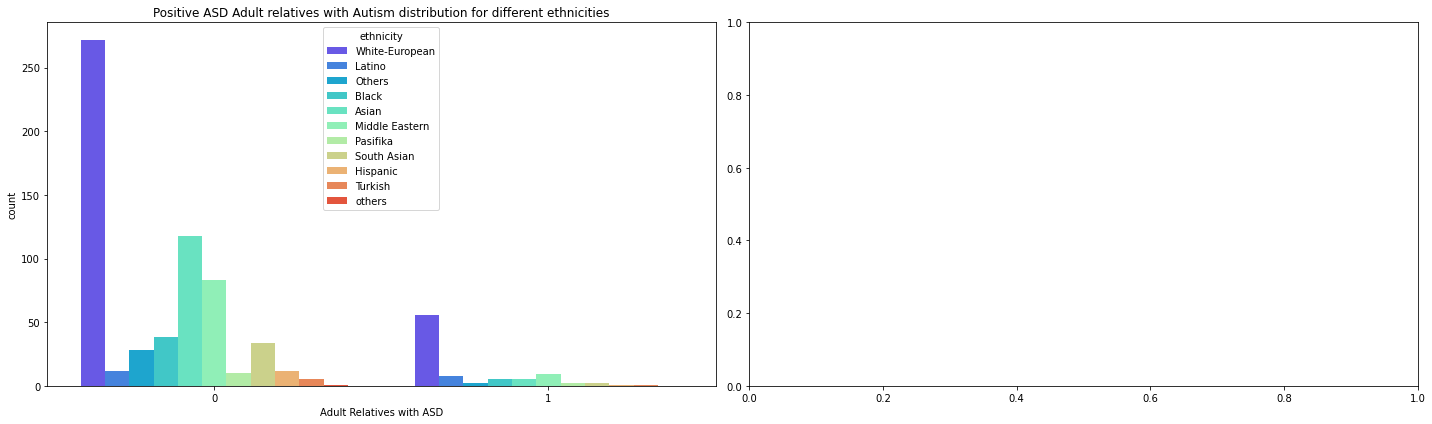

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.countplot(x='austim',data=data,hue='ethnicity',palette='rainbow',ax=ax[0])
ax[0].set_title('Positive ASD Adult relatives with Autism distribution for different ethnicities')
ax[0].set_xlabel('Adult Relatives with ASD')
#sns.countplot(x='Family_mem_with_ASD',data=data2,hue='Ethnicity',palette='rainbow',ax=ax[1])
#ax[1].set_title('Positive ASD Toddler relatives with Autism distribution for different ethnicities')
#ax[1].set_xlabel('Toddler Relatives with ASD')
plt.tight_layout()

In [ ]:
data['contry_of_res'].unique()

array(['United States', 'Brazil', 'Spain', 'Egypt', 'New Zealand',
       'Bahamas', 'Burundi', 'Austria', 'Argentina', 'Jordan', 'Ireland',
       'United Arab Emirates', 'Afghanistan', 'Lebanon', 'United Kingdom',
       'South Africa', 'Italy', 'Pakistan', 'Bangladesh', 'Chile',
       'France', 'China', 'Australia', 'Canada', 'Saudi Arabia',
       'Netherlands', 'Romania', 'Sweden', 'Tonga', 'Oman', 'India',
       'Philippines', 'Sri Lanka', 'Sierra Leone', 'Ethiopia', 'Viet Nam',
       'Iran', 'Costa Rica', 'Germany', 'Mexico', 'Russia', 'Armenia',
       'Iceland', 'Nicaragua', 'Hong Kong', 'Japan', 'Ukraine',
       'Kazakhstan', 'AmericanSamoa', 'Uruguay', 'Serbia', 'Portugal',
       'Malaysia', 'Ecuador', 'Niger', 'Belgium', 'Bolivia', 'Aruba',
       'Finland', 'Turkey', 'Nepal', 'Indonesia', 'Angola', 'Azerbaijan',
       'Iraq', 'Czech Republic', 'Cyprus'], dtype=object)

In [ ]:
data['ethnicity'].unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic',
       'Turkish', 'others'], dtype=object)

In [ ]:
data['relation'].unique()

array(['Self', 'Parent', 'Health care professional', 'Relative', 'Others'],
      dtype=object)

In [ ]:
data['age'].unique()

array(['26', '24', '27', '35', '40', '36', '17', '64', '29', '33', '18',
       '31', '30', '34', '38', '42', '43', '48', '37', '55', '50', '53',
       '20', '28', '21', '383', '47', '32', '44', '19', '58', '45', '22',
       '39', '25', '23', '54', '60', '41', '46', '56', '61', '59', '52',
       '49', '51'], dtype=object)

In [ ]:
#data['']

In [ ]:
data1 = pd.read_csv('datasets_38367_58429_Toddler Autism dataset July 2018.csv',na_values = '?')

In [ ]:
data1.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
data1.drop('Case_No',inplace = True,axis = 1)

In [ ]:
data1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
data1['Jaundice'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
data1['Who completed the test'].unique()

array(['family member', 'Health Care Professional',
       'Health care professional', 'Self', 'Others'], dtype=object)

In [ ]:
data1['Family_mem_with_ASD'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
data1['Age_Mons'].describe()

count    1054.000000
mean       27.867173
std         7.980354
min        12.000000
25%        23.000000
50%        30.000000
75%        36.000000
max        36.000000
Name: Age_Mons, dtype: float64

In [ ]:
data1['Age_Mons'] = data1['Age_Mons']//12 

In [ ]:
data1['Age_Mons'].unique()

array([2, 3, 1])

In [ ]:
data1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,2,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,3,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes


In [ ]:
columns = data1.columns

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values='?', strategy='most_frequent')
data1 = pd.DataFrame(imp.fit_transform(data1),columns = columns)

In [ ]:
data1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,2,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,3,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes


In [ ]:
data1['Class/ASD Traits '].replace(['No', 'Yes'],[0,1],inplace = True)

In [ ]:
data1['Class/ASD Traits '].unique()

array([0, 1])

In [ ]:
data1['Sex'].replace(['f', 'm'],[0,1],inplace = True)

In [ ]:
data1['Jaundice'].replace(['yes', 'no'],[0,1],inplace = True)

In [ ]:
data1['Family_mem_with_ASD'].replace(['yes', 'no'],[0,1],inplace = True)

In [ ]:
data1['Who completed the test'].unique()

array(['family member', 'Health Care Professional',
       'Health care professional', 'Self', 'Others'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 
data1['Who completed the test']= label_encoder.fit_transform(data1['Who completed the test']) 
data1['Who completed the test'].unique() 

array([4, 0, 1, 3, 2])

In [ ]:
data1.dtypes

A1                        object
A2                        object
A3                        object
A4                        object
A5                        object
A6                        object
A7                        object
A8                        object
A9                        object
A10                       object
Age_Mons                  object
Qchat-10-Score            object
Sex                        int64
Ethnicity                 object
Jaundice                   int64
Family_mem_with_ASD        int64
Who completed the test     int64
Class/ASD Traits           int64
dtype: object

In [ ]:
columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [ ]:
data1['Ethnicity'].unique()

array(['middle eastern', 'White European', 'Hispanic', 'black', 'asian',
       'south asian', 'Native Indian', 'Others', 'Latino', 'mixed',
       'Pacifica'], dtype=object)

In [ ]:
data1['Ethnicity']= label_encoder.fit_transform(data1['Ethnicity']) 
data1['Ethnicity'].unique() 

array([ 8,  5,  0,  7,  6, 10,  2,  3,  1,  9,  4])

In [ ]:
data1.dtypes

A1                        object
A2                        object
A3                        object
A4                        object
A5                        object
A6                        object
A7                        object
A8                        object
A9                        object
A10                       object
Age_Mons                  object
Qchat-10-Score            object
Sex                        int64
Ethnicity                  int64
Jaundice                   int64
Family_mem_with_ASD        int64
Who completed the test     int64
Class/ASD Traits           int64
dtype: object

In [ ]:
for i in range(0,11):
    data1.iloc[:,i] = data1.iloc[:,i].astype('int')

In [ ]:
data1.dtypes

A1                         int64
A2                         int64
A3                         int64
A4                         int64
A5                         int64
A6                         int64
A7                         int64
A8                         int64
A9                         int64
A10                        int64
Age_Mons                   int64
Qchat-10-Score            object
Sex                        int64
Ethnicity                  int64
Jaundice                   int64
Family_mem_with_ASD        int64
Who completed the test     int64
Class/ASD Traits           int64
dtype: object

In [ ]:
data1['Qchat-10-Score'] = data1['Qchat-10-Score'].astype('int')

In [ ]:
data1['Qchat-10-Score'].unique()

array([ 3,  4, 10,  9,  8,  5,  6,  2,  0,  7,  1])

In [ ]:
data1.dtypes

A1                        int64
A2                        int64
A3                        int64
A4                        int64
A5                        int64
A6                        int64
A7                        int64
A8                        int64
A9                        int64
A10                       int64
Age_Mons                  int64
Qchat-10-Score            int64
Sex                       int64
Ethnicity                 int64
Jaundice                  int64
Family_mem_with_ASD       int64
Who completed the test    int64
Class/ASD Traits          int64
dtype: object

In [ ]:
x1 = data1.iloc[:,0:17]
y1 = data1.iloc[:,17]

In [ ]:
x1

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test
0,0,0,0,0,0,0,1,1,0,1,2,3,0,8,0,1,4
1,1,1,0,0,0,1,1,0,0,0,3,4,1,5,0,1,4
2,1,0,0,0,0,0,1,1,0,1,3,4,1,8,0,1,4
3,1,1,1,1,1,1,1,1,1,1,2,10,1,0,1,1,4
4,1,1,0,1,1,1,1,1,1,1,1,9,0,5,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,2,1,0,5,1,0,4
1050,0,0,1,1,1,0,1,0,1,0,1,5,1,7,0,1,4
1051,1,0,1,1,1,1,1,1,1,1,1,9,1,8,0,1,4
1052,1,0,0,0,0,0,0,1,0,1,1,3,1,5,1,0,4


In [ ]:
y1

0       0
1       1
2       1
3       1
4       1
       ..
1049    0
1050    1
1051    1
1052    0
1053    1
Name: Class/ASD Traits , Length: 1054, dtype: int64

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['contry_of_res']= label_encoder.fit_transform(data['contry_of_res']) 
data['contry_of_res'].unique() 

array([64, 13, 56, 22, 43,  9, 14,  7,  3, 36, 33, 62,  0, 38, 63, 55, 34,
       47, 10, 16, 25, 17,  6, 15, 52, 42, 50, 58, 59, 46, 29, 48, 57, 54,
       23, 66, 31, 18, 26, 40, 51,  4, 28, 44, 27, 35, 61, 37,  1, 65, 53,
       49, 39, 21, 45, 11, 12,  5, 24, 60, 41, 30,  2,  8, 32, 20, 19])

In [ ]:
data['ethnicity']  = label_encoder.fit_transform(data['ethnicity']) 

In [ ]:
data['relation'] = label_encoder.fit_transform(data['relation'])

In [ ]:
data['ethnicity'].unique()

array([ 9,  3,  5,  1,  0,  4,  6,  7,  2,  8, 10])

In [ ]:
data['relation'].unique()

array([4, 2, 0, 3, 1])

In [ ]:
data.drop('contry_of_res',inplace = True,axis = 1)

In [ ]:
data.shape

(704, 18)

In [ ]:
data.dtypes

A1_Score     object
A2_Score     object
A3_Score     object
A4_Score     object
A5_Score     object
A6_Score     object
A7_Score     object
A8_Score     object
A9_Score     object
A10_Score    object
age          object
gender        int64
ethnicity     int64
jundice       int64
austim        int64
result       object
relation      int64
Class/ASD     int64
dtype: object

In [ ]:
for i in range(0,11):
    data.iloc[:,i] = data.iloc[:,i].astype('int')

In [ ]:
data.dtypes

A1_Score      int64
A2_Score      int64
A3_Score      int64
A4_Score      int64
A5_Score      int64
A6_Score      int64
A7_Score      int64
A8_Score      int64
A9_Score      int64
A10_Score     int64
age           int64
gender        int64
ethnicity     int64
jundice       int64
austim        int64
result       object
relation      int64
Class/ASD     int64
dtype: object

In [ ]:
data['result'] = data['result'].astype('int') 

In [ ]:
data.dtypes

A1_Score     int64
A2_Score     int64
A3_Score     int64
A4_Score     int64
A5_Score     int64
A6_Score     int64
A7_Score     int64
A8_Score     int64
A9_Score     int64
A10_Score    int64
age          int64
gender       int64
ethnicity    int64
jundice      int64
austim       int64
result       int64
relation     int64
Class/ASD    int64
dtype: object

In [ ]:
data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,0,9,0,0,6,4,0
1,1,1,0,1,0,0,0,1,0,1,24,1,3,0,1,5,4,0
2,1,1,0,1,1,0,1,1,1,1,27,1,3,1,1,8,2,1
3,1,1,0,1,0,0,1,1,0,1,35,0,9,0,1,6,4,0
4,1,0,0,0,0,0,0,1,0,0,40,0,9,0,0,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25,0,9,0,0,7,4,1
700,1,0,0,0,0,0,0,1,0,1,34,1,2,0,0,3,2,0
701,1,0,1,1,1,0,1,1,0,1,24,0,9,0,0,7,4,1
702,1,0,0,1,1,0,1,0,1,1,35,1,7,0,0,6,4,0


In [ ]:
data.corr()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,result,relation,Class/ASD
A1_Score,1.000000,0.011539,0.074096,0.127814,0.169369,0.110199,0.217538,0.147640,0.145452,0.118413,0.025379,-0.075011,0.053684,-0.019077,0.097630,0.397454,0.008398,0.297628
A2_Score,0.011539,1.000000,0.223921,0.158998,0.153821,0.185864,-0.041768,0.035408,0.205421,0.068883,0.020644,-0.047393,0.128518,0.112615,0.074555,0.392540,-0.047792,0.311382
A3_Score,0.074096,0.223921,1.000000,0.412722,0.264927,0.268846,0.078216,0.017771,0.315113,0.168454,0.030833,0.000795,0.110339,0.061760,0.113697,0.552356,0.029318,0.441074
A4_Score,0.127814,0.158998,0.412722,1.000000,0.306806,0.295152,0.151236,0.008617,0.327673,0.210968,0.033967,-0.056508,0.140787,0.064918,0.193820,0.586025,-0.013804,0.469945
A5_Score,0.169369,0.153821,0.264927,0.306806,1.000000,0.392354,0.238589,0.102086,0.396582,0.267561,-0.025054,-0.039688,0.009535,0.034378,0.090009,0.639706,0.048976,0.537004
A6_Score,0.110199,0.185864,0.268846,0.295152,0.392354,1.000000,0.175489,0.100123,0.479422,0.294435,0.035617,-0.083615,0.108745,0.078366,0.114048,0.630012,-0.090688,0.592091
A7_Score,0.217538,-0.041768,0.078216,0.151236,0.238589,0.175489,1.000000,0.085403,0.189480,0.252107,-0.026734,0.061900,-0.002004,0.030850,-0.008610,0.454848,0.032594,0.351429
A8_Score,0.147640,0.035408,0.017771,0.008617,0.102086,0.100123,0.085403,1.000000,0.101733,0.100782,-0.078154,0.064127,-0.048702,0.012101,0.034845,0.324020,0.051040,0.237161
A9_Score,0.145452,0.205421,0.315113,0.327673,0.396582,0.479422,0.189480,0.101733,1.000000,0.283340,0.054984,0.006940,0.081052,0.057717,0.167644,0.661205,-0.058046,0.635576
A10_Score,0.118413,0.068883,0.168454,0.210968,0.267561,0.294435,0.252107,0.100782,0.283340,1.000000,-0.007846,-0.055246,0.059843,0.052201,0.117969,0.537205,0.027427,0.385917


In [ ]:
x = data.iloc[:,0:17]
y = data.iloc[:,17]

In [ ]:
x

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,result,relation
0,1,1,1,1,0,0,1,1,0,0,26,0,9,0,0,6,4
1,1,1,0,1,0,0,0,1,0,1,24,1,3,0,1,5,4
2,1,1,0,1,1,0,1,1,1,1,27,1,3,1,1,8,2
3,1,1,0,1,0,0,1,1,0,1,35,0,9,0,1,6,4
4,1,0,0,0,0,0,0,1,0,0,40,0,9,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25,0,9,0,0,7,4
700,1,0,0,0,0,0,0,1,0,1,34,1,2,0,0,3,2
701,1,0,1,1,1,0,1,1,0,1,24,0,9,0,0,7,4
702,1,0,0,1,1,0,1,0,1,1,35,1,7,0,0,6,4


In [ ]:
y

0      0
1      0
2      1
3      0
4      0
      ..
699    1
700    0
701    1
702    0
703    1
Name: Class/ASD, Length: 704, dtype: int64

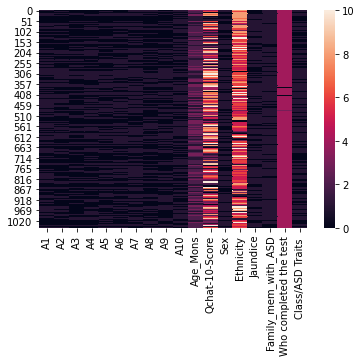

In [ ]:
import seaborn as sns
sns.heatmap(data1)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
data['Class/ASD'].value_counts()

0    515
1    189
Name: Class/ASD, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


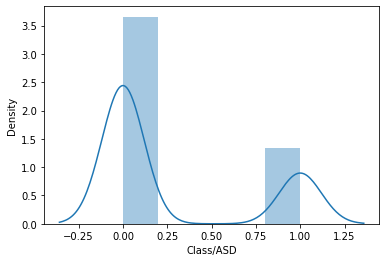

In [ ]:
sns.distplot(data['Class/ASD'])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV,train_test_split

In [ ]:
log = LogisticRegression(max_iter = 500)
grid = {'C':[0.001,0.01,0.1],'penalty':['l1','l2'],'solver' : ['saga']}
cv = KFold(n_splits = 5,random_state = None,shuffle = True)

In [ ]:
x_train,x_test,y_train,y_test = x1,x,y1,y 

In [ ]:
y.value_counts()

0    515
1    189
Name: Class/ASD, dtype: int64

In [ ]:
y1.value_counts()

1    728
0    326
Name: Class/ASD Traits , dtype: int64

In [ ]:
x_train

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test
0,0,0,0,0,0,0,1,1,0,1,2,3,0,8,0,1,4
1,1,1,0,0,0,1,1,0,0,0,3,4,1,5,0,1,4
2,1,0,0,0,0,0,1,1,0,1,3,4,1,8,0,1,4
3,1,1,1,1,1,1,1,1,1,1,2,10,1,0,1,1,4
4,1,1,0,1,1,1,1,1,1,1,1,9,0,5,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,2,1,0,5,1,0,4
1050,0,0,1,1,1,0,1,0,1,0,1,5,1,7,0,1,4
1051,1,0,1,1,1,1,1,1,1,1,1,9,1,8,0,1,4
1052,1,0,0,0,0,0,0,1,0,1,1,3,1,5,1,0,4


In [ ]:
y_train

0       0
1       1
2       1
3       1
4       1
       ..
1049    0
1050    1
1051    1
1052    0
1053    1
Name: Class/ASD Traits , Length: 1054, dtype: int64

In [ ]:
clf = GridSearchCV(log,grid,cv = cv,n_jobs = -1,refit=True)
clf.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2'],
                         'solver': ['saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[515   0]
 [189   0]]


In [ ]:
print(accuracy_score(y_test,y_pred))

0.7315340909090909


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       515
           1       0.00      0.00      0.00       189

    accuracy                           0.73       704
   macro avg       0.37      0.50      0.42       704
weighted avg       0.54      0.73      0.62       704



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
clf_svc = SVC(kernel = 'rbf',gamma = 1000)
clf_svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1000, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
'gamma': [1, 0.1, 0.01, 0.001, 100],
'degree':[2,3,4],
'kernel': ['rbf','poly']} 
cv = KFold(n_splits = 5,random_state = None,shuffle = True)
grid = GridSearchCV(SVC(cache_size = 300,max_iter = 700,), param_grid, cv = cv,refit = True, verbose = 3) 

grid.fit(x_train, y_train) 


Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] C=0.1, degree=2, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, score=0.739, total=   0.1s
[CV] C=0.1, degree=2, gamma=1, kernel=rbf ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, score=0.682, total=   0.1s
[CV] C=0.1, degree=2, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, score=0.701, total=   0.1s
[CV] C=0.1, degree=2, gamma=1, kernel=rbf ............................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_it

[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, score=0.697, total=   0.1s
[CV] C=0.1, degree=2, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, score=0.695, total=   0.1s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=rbf, score=0.976, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=rbf, score=0.976, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=rbf, score=0.995, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=rbf, score=0.995, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=rbf ..........................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=0.1, degree=2, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.01, kernel=rbf .........................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=rbf, score=0.981, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.01, kernel=rbf ............

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=0.1, degree=2, gamma=100, kernel=rbf, score=0.682, total=   0.0s
[CV] C=0.1, degree=2, gamma=100, kernel=rbf ..........................
[CV]  C=0.1, degree=2, gamma=100, kernel=rbf, score=0.673, total=   0.0s
[CV] C=0.1, degree=2, gamma=100, kernel=rbf ..........................
[CV]  C=0.1, degree=2, gamma=100, kernel=rbf, score=0.695, total=   0.0s
[CV] C=0.1, degree=2, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=2, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=2, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=2, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=2, gamma=100, kernel=poly ..............

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=0.1, degree=3, gamma=1, kernel=rbf, score=0.682, total=   0.1s
[CV] C=0.1, degree=3, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=3, gamma=1, kernel=rbf, score=0.701, total=   0.1s
[CV] C=0.1, degree=3, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=3, gamma=1, kernel=rbf, score=0.697, total=   0.1s
[CV] C=0.1, degree=3, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=3, gamma=1, kernel=rbf, score=0.695, total=   0.1s
[CV] C=0.1, degree=3, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=3, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=3, gamma=1, kernel=poly, score=0.991, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=3, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=poly ...........................
[CV

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=0.1, degree=3, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.976, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.976, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.995, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.995, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=3, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=3, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.1, kernel=poly ..................

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=0.1, degree=3, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.01, kernel=rbf .........................
[CV]  C=0.1, degree=3, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.01, kernel=rbf .........................
[CV]  C=0.1, degree=3, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.01, kernel=poly ........................
[CV]  C=0.1, degree=3, gamma=0.01, kernel=poly, score=0.986, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.01, kernel=poly ........................
[CV]  C=0.1, degree=3, gamma=0.01, kernel=poly, score=0.995, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.01, kernel=poly ........................
[CV]  C=0.1, degree=3, gamma=0.01, kernel=poly, score=0.995, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.01, kernel=poly ........................
[CV]  C=0.1, degree=3, gamma=0.01, kernel=poly, score=0.981, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.01, kernel=poly ......

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=0.1, degree=3, gamma=100, kernel=rbf, score=0.682, total=   0.0s
[CV] C=0.1, degree=3, gamma=100, kernel=rbf ..........................
[CV]  C=0.1, degree=3, gamma=100, kernel=rbf, score=0.673, total=   0.0s
[CV] C=0.1, degree=3, gamma=100, kernel=rbf ..........................
[CV]  C=0.1, degree=3, gamma=100, kernel=rbf, score=0.695, total=   0.0s
[CV] C=0.1, degree=3, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=3, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=3, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=3, gamma=100, kernel=poly, score=0.991, total=   0.0s
[CV] C=0.1, degree=3, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=3, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=3, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=3, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=3, gamma=100, kernel=poly ..............

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=0.1, degree=4, gamma=1, kernel=rbf, score=0.682, total=   0.1s
[CV] C=0.1, degree=4, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=4, gamma=1, kernel=rbf, score=0.701, total=   0.1s
[CV] C=0.1, degree=4, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=4, gamma=1, kernel=rbf, score=0.697, total=   0.1s
[CV] C=0.1, degree=4, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=4, gamma=1, kernel=rbf, score=0.695, total=   0.1s
[CV] C=0.1, degree=4, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=4, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=4, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=4, gamma=1, kernel=poly, score=0.991, total=   0.0s
[CV] C=0.1, degree=4, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=4, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=4, gamma=1, kernel=poly ...........................
[CV

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=0.1, degree=4, gamma=0.1, kernel=rbf, score=0.976, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=4, gamma=0.1, kernel=rbf, score=0.976, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=4, gamma=0.1, kernel=rbf, score=0.995, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=4, gamma=0.1, kernel=rbf, score=0.995, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=4, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=4, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=4, gamma=0.1, kernel=poly, score=0.991, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.1, kernel=poly ................

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=0.1, degree=4, gamma=100, kernel=rbf, score=0.673, total=   0.0s
[CV] C=0.1, degree=4, gamma=100, kernel=rbf ..........................
[CV]  C=0.1, degree=4, gamma=100, kernel=rbf, score=0.695, total=   0.0s
[CV] C=0.1, degree=4, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=4, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=4, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=4, gamma=100, kernel=poly, score=0.991, total=   0.0s
[CV] C=0.1, degree=4, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=4, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=4, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=4, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=4, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=4, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=2, gamma=1, kernel=rbf ..................

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .. C=1, degree=2, gamma=1, kernel=rbf, score=0.872, total=   0.1s
[CV] C=1, degree=2, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=2, gamma=1, kernel=rbf, score=0.886, total=   0.1s
[CV] C=1, degree=2, gamma=1, kernel=poly .............................
[CV] . C=1, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=2, gamma=1, kernel=poly .............................
[CV] . C=1, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=2, gamma=1, kernel=poly .............................
[CV] . C=1, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=2, gamma=1, kernel=poly .............................
[CV] . C=1, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=2, gamma=1, kernel=poly .............................
[CV] . C=1, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=2, gamma=0.1, kernel=rbf ............................
[CV]  

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=1, degree=2, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=2, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=2, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=2, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=2, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=2, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=2, gamma=0.01, kernel=rbf, score=0.991, total=   0.0s
[CV] C=1, degree=2, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=2, gamma=0.01, kernel=rbf, score=0.991, total=   0.0s
[CV] C=1, degree=2, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=2, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, degree=2, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=2, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, degree=2, gamma=0.01, kernel=rbf ...........................

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=1, degree=2, gamma=100, kernel=rbf, score=0.744, total=   0.0s
[CV] C=1, degree=2, gamma=100, kernel=rbf ............................
[CV]  C=1, degree=2, gamma=100, kernel=rbf, score=0.773, total=   0.0s
[CV] C=1, degree=2, gamma=100, kernel=rbf ............................
[CV]  C=1, degree=2, gamma=100, kernel=rbf, score=0.782, total=   0.0s
[CV] C=1, degree=2, gamma=100, kernel=rbf ............................
[CV]  C=1, degree=2, gamma=100, kernel=rbf, score=0.762, total=   0.0s
[CV] C=1, degree=2, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=2, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=2, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=2, gamma=100, kernel=poly ...........................
[CV

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV] .. C=1, degree=3, gamma=1, kernel=rbf, score=0.886, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=3, gamma=1, kernel=rbf, score=0.867, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=3, gamma=1, kernel=rbf, score=0.896, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=3, gamma=1, kernel=rbf, score=0.872, total=   0.1s
[CV] C=1, degree=3, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=3, gamma=1, kernel=rbf, score=0.886, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=poly .............................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] . C=1, degree=3, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=poly .............................
[CV] . C=1, degree=3, gamma=1, kernel=poly, score=0.991, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=poly .............................
[CV] . C=1, degree=3, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=poly .............................
[CV] . C=1, degree=3, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=poly .............................
[CV] . C=1, degree=3, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=3, gamma=0.1, kernel=rbf ............................
[CV]  C=1, degree=3, gamma=0.1, kernel=rbf, score=0.991, total=   0.0s
[CV] C=1, degree=3, gamma=0.1, kernel=rbf ............................
[CV]  C=1, degree=3, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, degree=3, gamma=0.1, kernel=rbf ............................
[CV]  

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=1, degree=3, gamma=100, kernel=rbf, score=0.782, total=   0.0s
[CV] C=1, degree=3, gamma=100, kernel=rbf ............................
[CV]  C=1, degree=3, gamma=100, kernel=rbf, score=0.762, total=   0.0s
[CV] C=1, degree=3, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=3, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=3, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=3, gamma=100, kernel=poly, score=0.991, total=   0.0s
[CV] C=1, degree=3, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=3, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=3, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=3, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=3, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=3, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=rbf ..............................
[

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV] .. C=1, degree=4, gamma=1, kernel=rbf, score=0.896, total=   0.1s
[CV] C=1, degree=4, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=4, gamma=1, kernel=rbf, score=0.872, total=   0.1s
[CV] C=1, degree=4, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=4, gamma=1, kernel=rbf, score=0.886, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=poly .............................
[CV] . C=1, degree=4, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=poly .............................
[CV] . C=1, degree=4, gamma=1, kernel=poly, score=0.991, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=poly .............................
[CV] . C=1, degree=4, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=poly .............................
[CV] . C=1, degree=4, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=poly .............................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=1, degree=4, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, degree=4, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=4, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=4, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=4, gamma=0.1, kernel=poly, score=0.991, total=   0.0s
[CV] C=1, degree=4, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=4, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=4, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=4, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=4, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=4, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=4, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=4, gamma=0.01, kernel=rbf, score=0.991, total=   0.0s
[CV] C=1, degree=4, gamma=0.01, kernel=rbf ...........................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=1, degree=4, gamma=100, kernel=rbf, score=0.782, total=   0.0s
[CV] C=1, degree=4, gamma=100, kernel=rbf ............................
[CV]  C=1, degree=4, gamma=100, kernel=rbf, score=0.762, total=   0.0s
[CV] C=1, degree=4, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=4, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=4, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=4, gamma=100, kernel=poly, score=0.991, total=   0.0s
[CV] C=1, degree=4, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=4, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=4, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=4, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=4, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=4, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=2, gamma=1, kernel=rbf .............................
[

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV] . C=10, degree=2, gamma=1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=10, degree=2, gamma=1, kernel=poly ............................
[CV]  C=10, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=2, gamma=1, kernel=poly ............................
[CV]  C=10, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=2, gamma=1, kernel=poly ............................
[CV]  C=10, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=2, gamma=1, kernel=poly ............................
[CV]  C=10, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=2, gamma=1, kernel=poly ............................
[CV]  C=10, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=2, gamma=0.1, kernel=rbf ...........................
[CV]  C=10, degree=2, gamma=0.1, kernel=rbf, score=0.995, total=   0.0s
[CV] C=10, degree=2, gamma=0.1, kernel=rbf ...........................
[CV] 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=10, degree=2, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, degree=2, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=2, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, degree=2, gamma=0.01, kernel=poly .........................
[CV]  C=10, degree=2, gamma=0.01, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=2, gamma=0.01, kernel=poly .........................
[CV]  C=10, degree=2, gamma=0.01, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=2, gamma=0.01, kernel=poly .........................
[CV]  C=10, degree=2, gamma=0.01, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=2, gamma=0.01, kernel=poly .........................
[CV]  C=10, degree=2, gamma=0.01, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=2, gamma=0.01, kernel=poly .........................
[CV]  C=10, degree=2, gamma=0.01, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=2, gamma=0.001, kernel=rbf .............

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=10, degree=2, gamma=100, kernel=rbf, score=0.801, total=   0.0s
[CV] C=10, degree=2, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=2, gamma=100, kernel=rbf, score=0.744, total=   0.0s
[CV] C=10, degree=2, gamma=100, kernel=rbf ...........................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=10, degree=2, gamma=100, kernel=rbf, score=0.773, total=   0.0s
[CV] C=10, degree=2, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=2, gamma=100, kernel=rbf, score=0.782, total=   0.0s
[CV] C=10, degree=2, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=2, gamma=100, kernel=rbf, score=0.762, total=   0.0s
[CV] C=10, degree=2, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=2, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=2, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=2, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=2, gamma=100, kernel=poly ......................

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV] . C=10, degree=3, gamma=1, kernel=rbf, score=0.877, total=   0.0s
[CV] C=10, degree=3, gamma=1, kernel=rbf .............................
[CV] . C=10, degree=3, gamma=1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=10, degree=3, gamma=1, kernel=rbf .............................
[CV] . C=10, degree=3, gamma=1, kernel=rbf, score=0.886, total=   0.1s
[CV] C=10, degree=3, gamma=1, kernel=rbf .............................
[CV] . C=10, degree=3, gamma=1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=10, degree=3, gamma=1, kernel=poly ............................
[CV]  C=10, degree=3, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=3, gamma=1, kernel=poly ............................
[CV]  C=10, degree=3, gamma=1, kernel=poly, score=0.991, total=   0.0s
[CV] C=10, degree=3, gamma=1, kernel=poly ............................
[CV]  C=10, degree=3, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=3, gamma=1, kernel=poly ............................
[CV]  

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=10, degree=3, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=poly ..........................
[CV]  C=10, degree=3, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=3, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=3, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, degree=3, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=3, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, degree=3, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=3, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, degree=3, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=3, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, degree=3, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=3, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, degree=3, gamma=0.01, kernel=poly ..................

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=10, degree=3, gamma=0.001, kernel=poly, score=0.815, total=   0.0s
[CV] C=10, degree=3, gamma=0.001, kernel=poly ........................
[CV]  C=10, degree=3, gamma=0.001, kernel=poly, score=0.711, total=   0.0s
[CV] C=10, degree=3, gamma=0.001, kernel=poly ........................
[CV]  C=10, degree=3, gamma=0.001, kernel=poly, score=0.706, total=   0.0s
[CV] C=10, degree=3, gamma=0.001, kernel=poly ........................
[CV]  C=10, degree=3, gamma=0.001, kernel=poly, score=0.711, total=   0.0s
[CV] C=10, degree=3, gamma=0.001, kernel=poly ........................
[CV]  C=10, degree=3, gamma=0.001, kernel=poly, score=0.695, total=   0.0s
[CV] C=10, degree=3, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=3, gamma=100, kernel=rbf, score=0.801, total=   0.0s
[CV] C=10, degree=3, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=3, gamma=100, kernel=rbf, score=0.744, total=   0.0s
[CV] C=10, degree=3, gamma=100, kernel=rbf ............

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=10, degree=3, gamma=100, kernel=rbf, score=0.773, total=   0.0s
[CV] C=10, degree=3, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=3, gamma=100, kernel=rbf, score=0.782, total=   0.0s
[CV] C=10, degree=3, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=3, gamma=100, kernel=rbf, score=0.762, total=   0.0s
[CV] C=10, degree=3, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=3, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=3, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=3, gamma=100, kernel=poly, score=0.991, total=   0.0s
[CV] C=10, degree=3, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=3, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=3, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=3, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=3, gamma=100, kernel=poly ......................

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV] . C=10, degree=4, gamma=1, kernel=rbf, score=0.877, total=   0.1s
[CV] C=10, degree=4, gamma=1, kernel=rbf .............................
[CV] . C=10, degree=4, gamma=1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=10, degree=4, gamma=1, kernel=rbf .............................
[CV] . C=10, degree=4, gamma=1, kernel=rbf, score=0.886, total=   0.1s
[CV] C=10, degree=4, gamma=1, kernel=rbf .............................
[CV] . C=10, degree=4, gamma=1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=10, degree=4, gamma=1, kernel=poly ............................
[CV]  C=10, degree=4, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=4, gamma=1, kernel=poly ............................
[CV]  C=10, degree=4, gamma=1, kernel=poly, score=0.991, total=   0.0s
[CV] C=10, degree=4, gamma=1, kernel=poly ............................
[CV]  C=10, degree=4, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=4, gamma=1, kernel=poly ............................
[CV]  

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=10, degree=4, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=4, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=4, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, degree=4, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=4, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, degree=4, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=4, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, degree=4, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=4, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, degree=4, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=4, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, degree=4, gamma=0.01, kernel=poly .........................
[CV]  C=10, degree=4, gamma=0.01, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=4, gamma=0.01, kernel=poly .................

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=10, degree=4, gamma=0.001, kernel=poly, score=0.735, total=   0.0s
[CV] C=10, degree=4, gamma=0.001, kernel=poly ........................
[CV]  C=10, degree=4, gamma=0.001, kernel=poly, score=0.678, total=   0.0s
[CV] C=10, degree=4, gamma=0.001, kernel=poly ........................
[CV]  C=10, degree=4, gamma=0.001, kernel=poly, score=0.682, total=   0.0s
[CV] C=10, degree=4, gamma=0.001, kernel=poly ........................
[CV]  C=10, degree=4, gamma=0.001, kernel=poly, score=0.673, total=   0.0s
[CV] C=10, degree=4, gamma=0.001, kernel=poly ........................
[CV]  C=10, degree=4, gamma=0.001, kernel=poly, score=0.686, total=   0.0s
[CV] C=10, degree=4, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=4, gamma=100, kernel=rbf, score=0.801, total=   0.0s
[CV] C=10, degree=4, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=4, gamma=100, kernel=rbf, score=0.744, total=   0.0s
[CV] C=10, degree=4, gamma=100, kernel=rbf ............

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=10, degree=4, gamma=100, kernel=rbf, score=0.773, total=   0.0s
[CV] C=10, degree=4, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=4, gamma=100, kernel=rbf, score=0.782, total=   0.0s
[CV] C=10, degree=4, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=4, gamma=100, kernel=rbf, score=0.762, total=   0.0s
[CV] C=10, degree=4, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=4, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=4, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=4, gamma=100, kernel=poly, score=0.991, total=   0.0s
[CV] C=10, degree=4, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=4, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=4, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=4, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, degree=4, gamma=100, kernel=poly ......................

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=100, degree=2, gamma=1, kernel=rbf, score=0.886, total=   0.1s
[CV] C=100, degree=2, gamma=1, kernel=rbf ............................
[CV]  C=100, degree=2, gamma=1, kernel=rbf, score=0.900, total=   0.1s
[CV] C=100, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=0.1, kernel=rbf ..........................
[

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=100, degree=2, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=0.1, kernel=poly .........................
[CV]  C=100, degree=2, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=0.1, kernel=poly .........................
[CV]  C=100, degree=2, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=2, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=2, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=2, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=2, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=0.01, kernel=rbf ...........

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=100, degree=2, gamma=0.001, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=0.001, kernel=poly .......................
[CV]  C=100, degree=2, gamma=0.001, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=0.001, kernel=poly .......................
[CV]  C=100, degree=2, gamma=0.001, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=0.001, kernel=poly .......................
[CV]  C=100, degree=2, gamma=0.001, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=0.001, kernel=poly .......................
[CV]  C=100, degree=2, gamma=0.001, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=100, kernel=rbf ..........................
[CV]  C=100, degree=2, gamma=100, kernel=rbf, score=0.801, total=   0.1s
[CV] C=100, degree=2, gamma=100, kernel=rbf ..........................
[CV]  C=100, degree=2, gamma=100, kernel=rbf, score=0.744, total=   0.0s
[CV] C=100, degree=2, gamma=100, kernel=rbf ....

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=100, degree=2, gamma=100, kernel=rbf, score=0.782, total=   0.0s
[CV] C=100, degree=2, gamma=100, kernel=rbf ..........................
[CV]  C=100, degree=2, gamma=100, kernel=rbf, score=0.762, total=   0.0s
[CV] C=100, degree=2, gamma=100, kernel=poly .........................
[CV]  C=100, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=100, kernel=poly .........................
[CV]  C=100, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=100, kernel=poly .........................
[CV]  C=100, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=100, kernel=poly .........................
[CV]  C=100, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=2, gamma=100, kernel=poly .........................
[CV]  C=100, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=3, gamma=1, kernel=rbf ................

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=100, degree=3, gamma=1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=100, degree=3, gamma=1, kernel=rbf ............................
[CV]  C=100, degree=3, gamma=1, kernel=rbf, score=0.886, total=   0.0s
[CV] C=100, degree=3, gamma=1, kernel=rbf ............................
[CV]  C=100, degree=3, gamma=1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=100, degree=3, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=3, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=3, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=3, gamma=1, kernel=poly, score=0.991, total=   0.0s
[CV] C=100, degree=3, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=3, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=3, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=3, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=3, gamma=1, kernel=poly ...........................
[C

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=100, degree=3, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=100, degree=3, gamma=0.1, kernel=rbf ..........................
[CV]  C=100, degree=3, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=100, degree=3, gamma=0.1, kernel=poly .........................
[CV]  C=100, degree=3, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=3, gamma=0.1, kernel=poly .........................
[CV]  C=100, degree=3, gamma=0.1, kernel=poly, score=0.991, total=   0.0s
[CV] C=100, degree=3, gamma=0.1, kernel=poly .........................
[CV]  C=100, degree=3, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=3, gamma=0.1, kernel=poly .........................
[CV]  C=100, degree=3, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=3, gamma=0.1, kernel=poly .........................
[CV]  C=100, degree=3, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=3, gamma=0.01, kernel=rbf .............

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=100, degree=3, gamma=100, kernel=rbf, score=0.801, total=   0.0s
[CV] C=100, degree=3, gamma=100, kernel=rbf ..........................
[CV]  C=100, degree=3, gamma=100, kernel=rbf, score=0.744, total=   0.0s
[CV] C=100, degree=3, gamma=100, kernel=rbf ..........................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=100, degree=3, gamma=100, kernel=rbf, score=0.773, total=   0.0s
[CV] C=100, degree=3, gamma=100, kernel=rbf ..........................
[CV]  C=100, degree=3, gamma=100, kernel=rbf, score=0.782, total=   0.0s
[CV] C=100, degree=3, gamma=100, kernel=rbf ..........................
[CV]  C=100, degree=3, gamma=100, kernel=rbf, score=0.762, total=   0.0s
[CV] C=100, degree=3, gamma=100, kernel=poly .........................
[CV]  C=100, degree=3, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=3, gamma=100, kernel=poly .........................
[CV]  C=100, degree=3, gamma=100, kernel=poly, score=0.991, total=   0.0s
[CV] C=100, degree=3, gamma=100, kernel=poly .........................
[CV]  C=100, degree=3, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=3, gamma=100, kernel=poly .........................
[CV]  C=100, degree=3, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=3, gamma=100, kernel=poly ..............

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=100, degree=4, gamma=1, kernel=rbf, score=0.877, total=   0.0s
[CV] C=100, degree=4, gamma=1, kernel=rbf ............................
[CV]  C=100, degree=4, gamma=1, kernel=rbf, score=0.900, total=   0.1s
[CV] C=100, degree=4, gamma=1, kernel=rbf ............................
[CV]  C=100, degree=4, gamma=1, kernel=rbf, score=0.886, total=   0.1s
[CV] C=100, degree=4, gamma=1, kernel=rbf ............................
[CV]  C=100, degree=4, gamma=1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=100, degree=4, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=4, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=4, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=4, gamma=1, kernel=poly, score=0.991, total=   0.0s
[CV] C=100, degree=4, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=4, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=4, gamma=1, kernel=poly ...........................
[CV

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=100, degree=4, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=4, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=4, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=100, degree=4, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=4, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=100, degree=4, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=4, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=100, degree=4, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=4, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=100, degree=4, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=4, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=100, degree=4, gamma=0.01, kernel=poly ........................
[CV]  C=100, degree=4, gamma=0.01, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=4, gamma=0.01, kernel=poly .........

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=100, degree=4, gamma=0.001, kernel=poly, score=0.716, total=   0.0s
[CV] C=100, degree=4, gamma=0.001, kernel=poly .......................
[CV]  C=100, degree=4, gamma=0.001, kernel=poly, score=0.711, total=   0.0s
[CV] C=100, degree=4, gamma=0.001, kernel=poly .......................
[CV]  C=100, degree=4, gamma=0.001, kernel=poly, score=0.758, total=   0.0s
[CV] C=100, degree=4, gamma=0.001, kernel=poly .......................
[CV]  C=100, degree=4, gamma=0.001, kernel=poly, score=0.738, total=   0.0s
[CV] C=100, degree=4, gamma=100, kernel=rbf ..........................
[CV]  C=100, degree=4, gamma=100, kernel=rbf, score=0.801, total=   0.0s
[CV] C=100, degree=4, gamma=100, kernel=rbf ..........................
[CV]  C=100, degree=4, gamma=100, kernel=rbf, score=0.744, total=   0.0s
[CV] C=100, degree=4, gamma=100, kernel=rbf ..........................
[CV]  C=100, degree=4, gamma=100, kernel=rbf, score=0.773, total=   0.0s
[CV] C=100, degree=4, gamma=100, kernel=rbf .......

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=100, degree=4, gamma=100, kernel=rbf, score=0.782, total=   0.0s
[CV] C=100, degree=4, gamma=100, kernel=rbf ..........................
[CV]  C=100, degree=4, gamma=100, kernel=rbf, score=0.762, total=   0.0s
[CV] C=100, degree=4, gamma=100, kernel=poly .........................
[CV]  C=100, degree=4, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=4, gamma=100, kernel=poly .........................
[CV]  C=100, degree=4, gamma=100, kernel=poly, score=0.991, total=   0.0s
[CV] C=100, degree=4, gamma=100, kernel=poly .........................
[CV]  C=100, degree=4, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=4, gamma=100, kernel=poly .........................
[CV]  C=100, degree=4, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, degree=4, gamma=100, kernel=poly .........................
[CV]  C=100, degree=4, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=2, gamma=1, kernel=rbf ...............

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=1000, degree=2, gamma=1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=1000, degree=2, gamma=1, kernel=rbf ...........................
[CV]  C=1000, degree=2, gamma=1, kernel=rbf, score=0.886, total=   0.1s
[CV] C=1000, degree=2, gamma=1, kernel=rbf ...........................
[CV]  C=1000, degree=2, gamma=1, kernel=rbf, score=0.900, total=   0.1s
[CV] C=1000, degree=2, gamma=1, kernel=poly ..........................
[CV]  C=1000, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=2, gamma=1, kernel=poly ..........................
[CV]  C=1000, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=2, gamma=1, kernel=poly ..........................
[CV]  C=1000, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=2, gamma=1, kernel=poly ..........................
[CV]  C=1000, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=2, gamma=1, kernel=poly ......................

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=1000, degree=2, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, degree=2, gamma=0.1, kernel=rbf .........................
[CV]  C=1000, degree=2, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, degree=2, gamma=0.1, kernel=rbf .........................
[CV]  C=1000, degree=2, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, degree=2, gamma=0.1, kernel=poly ........................
[CV]  C=1000, degree=2, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=2, gamma=0.1, kernel=poly ........................
[CV]  C=1000, degree=2, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=2, gamma=0.1, kernel=poly ........................
[CV]  C=1000, degree=2, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=2, gamma=0.1, kernel=poly ........................
[CV]  C=1000, degree=2, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=2, gamma=0.1, kernel=poly ......

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=1000, degree=2, gamma=100, kernel=rbf, score=0.801, total=   0.0s
[CV] C=1000, degree=2, gamma=100, kernel=rbf .........................
[CV]  C=1000, degree=2, gamma=100, kernel=rbf, score=0.744, total=   0.0s
[CV] C=1000, degree=2, gamma=100, kernel=rbf .........................
[CV]  C=1000, degree=2, gamma=100, kernel=rbf, score=0.773, total=   0.0s
[CV] C=1000, degree=2, gamma=100, kernel=rbf .........................
[CV]  C=1000, degree=2, gamma=100, kernel=rbf, score=0.782, total=   0.0s
[CV] C=1000, degree=2, gamma=100, kernel=rbf .........................
[CV]  C=1000, degree=2, gamma=100, kernel=rbf, score=0.762, total=   0.0s
[CV] C=1000, degree=2, gamma=100, kernel=poly ........................
[CV]  C=1000, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=2, gamma=100, kernel=poly ........................
[CV]  C=1000, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=2, gamma=100, kernel=poly ........

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=1000, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=2, gamma=100, kernel=poly ........................
[CV]  C=1000, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=2, gamma=100, kernel=poly ........................
[CV]  C=1000, degree=2, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=3, gamma=1, kernel=rbf ...........................
[CV]  C=1000, degree=3, gamma=1, kernel=rbf, score=0.905, total=   0.0s
[CV] C=1000, degree=3, gamma=1, kernel=rbf ...........................
[CV]  C=1000, degree=3, gamma=1, kernel=rbf, score=0.877, total=   0.0s
[CV] C=1000, degree=3, gamma=1, kernel=rbf ...........................
[CV]  C=1000, degree=3, gamma=1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=1000, degree=3, gamma=1, kernel=rbf ...........................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=1000, degree=3, gamma=1, kernel=rbf, score=0.886, total=   0.1s
[CV] C=1000, degree=3, gamma=1, kernel=rbf ...........................
[CV]  C=1000, degree=3, gamma=1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=1000, degree=3, gamma=1, kernel=poly ..........................
[CV]  C=1000, degree=3, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=3, gamma=1, kernel=poly ..........................
[CV]  C=1000, degree=3, gamma=1, kernel=poly, score=0.991, total=   0.0s
[CV] C=1000, degree=3, gamma=1, kernel=poly ..........................
[CV]  C=1000, degree=3, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=3, gamma=1, kernel=poly ..........................
[CV]  C=1000, degree=3, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=3, gamma=1, kernel=poly ..........................
[CV]  C=1000, degree=3, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=3, gamma=0.1, kernel=rbf ....................

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=1000, degree=3, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=3, gamma=0.1, kernel=poly ........................
[CV]  C=1000, degree=3, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=3, gamma=0.1, kernel=poly ........................
[CV]  C=1000, degree=3, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=3, gamma=0.01, kernel=rbf ........................
[CV]  C=1000, degree=3, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, degree=3, gamma=0.01, kernel=rbf ........................
[CV]  C=1000, degree=3, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, degree=3, gamma=0.01, kernel=rbf ........................
[CV]  C=1000, degree=3, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, degree=3, gamma=0.01, kernel=rbf ........................
[CV]  C=1000, degree=3, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, degree=3, gamma=0.01, kernel=rbf ...

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=1000, degree=3, gamma=0.001, kernel=poly, score=0.991, total=   0.0s
[CV] C=1000, degree=3, gamma=0.001, kernel=poly ......................
[CV]  C=1000, degree=3, gamma=0.001, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=3, gamma=0.001, kernel=poly ......................
[CV]  C=1000, degree=3, gamma=0.001, kernel=poly, score=0.995, total=   0.0s
[CV] C=1000, degree=3, gamma=0.001, kernel=poly ......................
[CV]  C=1000, degree=3, gamma=0.001, kernel=poly, score=0.995, total=   0.0s
[CV] C=1000, degree=3, gamma=100, kernel=rbf .........................
[CV]  C=1000, degree=3, gamma=100, kernel=rbf, score=0.801, total=   0.0s
[CV] C=1000, degree=3, gamma=100, kernel=rbf .........................
[CV]  C=1000, degree=3, gamma=100, kernel=rbf, score=0.744, total=   0.0s
[CV] C=1000, degree=3, gamma=100, kernel=rbf .........................
[CV]  C=1000, degree=3, gamma=100, kernel=rbf, score=0.773, total=   0.0s
[CV] C=1000, degree=3, gamma=100, kernel=rbf

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=1000, degree=3, gamma=100, kernel=rbf, score=0.762, total=   0.0s
[CV] C=1000, degree=3, gamma=100, kernel=poly ........................
[CV]  C=1000, degree=3, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=3, gamma=100, kernel=poly ........................
[CV]  C=1000, degree=3, gamma=100, kernel=poly, score=0.991, total=   0.0s
[CV] C=1000, degree=3, gamma=100, kernel=poly ........................
[CV]  C=1000, degree=3, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=3, gamma=100, kernel=poly ........................
[CV]  C=1000, degree=3, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=3, gamma=100, kernel=poly ........................
[CV]  C=1000, degree=3, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=4, gamma=1, kernel=rbf ...........................
[CV]  C=1000, degree=4, gamma=1, kernel=rbf, score=0.905, total=   0.1s
[CV] C=1000, degree=4, gamma=1, kernel=rbf ..........

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=1000, degree=4, gamma=1, kernel=rbf, score=0.900, total=   0.1s
[CV] C=1000, degree=4, gamma=1, kernel=rbf ...........................
[CV]  C=1000, degree=4, gamma=1, kernel=rbf, score=0.886, total=   0.1s
[CV] C=1000, degree=4, gamma=1, kernel=rbf ...........................
[CV]  C=1000, degree=4, gamma=1, kernel=rbf, score=0.900, total=   0.1s
[CV] C=1000, degree=4, gamma=1, kernel=poly ..........................
[CV]  C=1000, degree=4, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=4, gamma=1, kernel=poly ..........................
[CV]  C=1000, degree=4, gamma=1, kernel=poly, score=0.991, total=   0.0s
[CV] C=1000, degree=4, gamma=1, kernel=poly ..........................
[CV]  C=1000, degree=4, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=4, gamma=1, kernel=poly ..........................
[CV]  C=1000, degree=4, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=4, gamma=1, kernel=poly ......................

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=1000, degree=4, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, degree=4, gamma=0.1, kernel=rbf .........................
[CV]  C=1000, degree=4, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, degree=4, gamma=0.1, kernel=poly ........................
[CV]  C=1000, degree=4, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=4, gamma=0.1, kernel=poly ........................
[CV]  C=1000, degree=4, gamma=0.1, kernel=poly, score=0.991, total=   0.0s
[CV] C=1000, degree=4, gamma=0.1, kernel=poly ........................
[CV]  C=1000, degree=4, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=4, gamma=0.1, kernel=poly ........................
[CV]  C=1000, degree=4, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=4, gamma=0.1, kernel=poly ........................
[CV]  C=1000, degree=4, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=4, gamma=0.01, kernel=rbf .....

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

[CV]  C=1000, degree=4, gamma=100, kernel=rbf, score=0.801, total=   0.0s
[CV] C=1000, degree=4, gamma=100, kernel=rbf .........................
[CV]  C=1000, degree=4, gamma=100, kernel=rbf, score=0.744, total=   0.0s
[CV] C=1000, degree=4, gamma=100, kernel=rbf .........................
[CV]  C=1000, degree=4, gamma=100, kernel=rbf, score=0.773, total=   0.0s
[CV] C=1000, degree=4, gamma=100, kernel=rbf .........................
[CV]  C=1000, degree=4, gamma=100, kernel=rbf, score=0.782, total=   0.0s
[CV] C=1000, degree=4, gamma=100, kernel=rbf .........................
[CV]  C=1000, degree=4, gamma=100, kernel=rbf, score=0.762, total=   0.0s
[CV] C=1000, degree=4, gamma=100, kernel=poly ........................
[CV]  C=1000, degree=4, gamma=100, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=4, gamma=100, kernel=poly ........................
[CV]  C=1000, degree=4, gamma=100, kernel=poly, score=0.991, total=   0.0s
[CV] C=1000, degree=4, gamma=100, kernel=poly ........

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:   1

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=300,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=700,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4],
                         'gamma': [1, 0.1, 0.01, 0.001, 100],
                         'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid_pred = grid.predict(x_test)
grid_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(classification_report(y_test,grid_pred))
print(confusion_matrix(y_test,grid_pred))
print(accuracy_score(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       515
           1       0.00      0.00      0.00       189

    accuracy                           0.73       704
   macro avg       0.37      0.50      0.42       704
weighted avg       0.54      0.73      0.62       704

[[515   0]
 [189   0]]
0.7315340909090909


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
d_clf = DecisionTreeClassifier()
d_clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
d_pred = d_clf.predict(x_test)

In [ ]:
print(classification_report(d_pred,y_test))
print(accuracy_score(d_pred,y_test))
print(confusion_matrix(d_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84       704
           1       0.00      0.00      0.00         0

    accuracy                           0.73       704
   macro avg       0.50      0.37      0.42       704
weighted avg       1.00      0.73      0.84       704

0.7315340909090909
[[515 189]
 [  0   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
r_clf = RandomForestClassifier().fit(x_train,y_train)

In [ ]:
r_pred = r_clf.predict(x_test)

In [ ]:
print(classification_report(r_pred,y_test))
print(accuracy_score(r_pred,y_test))
print(confusion_matrix(r_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84       704
           1       0.00      0.00      0.00         0

    accuracy                           0.73       704
   macro avg       0.50      0.37      0.42       704
weighted avg       1.00      0.73      0.84       704

0.7315340909090909
[[515 189]
 [  0   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
data['age'].describe()

count    704.000000
mean      29.673295
std       16.490476
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max      383.000000
Name: age, dtype: float64

In [ ]:
data['age']

0      26
1      24
2      27
3      35
4      40
       ..
699    25
700    34
701    24
702    35
703    26
Name: age, Length: 704, dtype: int64

In [ ]:
columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [ ]:
columns.drop('Class/ASD Traits ')

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test'],
      dtype='object')

In [ ]:
lgb_params={
'class_weight': 'balanced', 
'boosting_type': 'goss', 
'num_leaves': 76, 
'learning_rate': 0.055533968216953146, 
'subsample_for_bin': 80000,
'min_child_samples': 460, 
'reg_alpha': 0.6122448979591836,
  'reg_lambda': 1.0, 'colsample_bytree': 0.8222222222222222}

In [ ]:
lgb_params = {
    'task': 'train',
    'boosting_type': 'goss',
    'objective': 'binary',
    'metric':'binary_logloss',
    'metric': {'l2', 'auc','l1','binary_error','mape'},
    'num_leaves': 256,
    'learning_rate': 0.3,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'verbose': None,
    'max_bin':255,
    'num_threads':7,
    'num_iterations':500,
    'max_depth':8,
    'min_data_in_leaf':10,
    'gpu_use_dp':'True',
    'alpha':0.5}
lgb_train = lgb.Dataset(x1, y1)
model = lgb.train(lgb_params,lgb_train,num_boost_round=200)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [ ]:
y_pred_lgb=model.predict(x)
y_pred_lgb

array([2.10041667e-04, 1.45924623e-04, 1.43717026e-03, 2.91807826e-04,
       4.72008863e-06, 1.64422376e-03, 7.81412037e-06, 1.39906447e-04,
       4.27559105e-04, 3.48503890e-04, 1.62439680e-03, 3.44991148e-04,
       5.18129441e-04, 9.55284651e-05, 9.54006614e-05, 2.28771653e-04,
       3.40919510e-04, 2.37551956e-06, 3.01225976e-06, 1.36277205e-05,
       1.03890276e-05, 5.09480746e-07, 1.27797628e-04, 2.37551956e-06,
       9.24387458e-05, 1.43374447e-05, 1.16885561e-06, 1.16885561e-06,
       1.16885561e-06, 7.53590808e-05, 4.87681394e-07, 6.55539736e-04,
       2.04343232e-04, 1.62222690e-03, 1.62222690e-03, 1.26069175e-06,
       2.30231522e-04, 8.75329954e-04, 1.15358854e-03, 8.29268288e-04,
       6.32626974e-04, 3.89078757e-06, 1.21411318e-05, 1.94454499e-05,
       1.14271463e-03, 1.09637045e-03, 1.08259043e-04, 1.44600489e-04,
       7.44559809e-06, 1.10142508e-03, 1.27586261e-05, 1.62222690e-03,
       1.23928947e-06, 7.95118743e-04, 1.62439680e-03, 1.39169974e-03,
      

In [ ]:
for i in range(0,len(y_pred_lgb)):
    if y_pred_lgb[i]>=.5:       
       y_pred_lgb[i]=1
    else:  
       y_pred_lgb[i]=0
y_pred_lgb

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
cm =confusion_matrix(y, y_pred_lgb)
accuracy=accuracy_score(y,y_pred_lgb)
print(classification_report(y,y_pred_lgb))
print(cm,accuracy)

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       515
           1       0.00      0.00      0.00       189

    accuracy                           0.73       704
   macro avg       0.37      0.50      0.42       704
weighted avg       0.54      0.73      0.62       704

[[515   0]
 [189   0]] 0.7315340909090909


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
def create_model(optimizer):
    model = keras.Sequential()
    model.add(keras.layers.Dense(1054,activation='relu',input_dim = 17))
    model.add(keras.layers.Dense(50,activation = 'sigmoid'))
    model.add(keras.layers.Dense(1,activation = 'relu'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
model = create_model('adam')
model.fit(x1,y1,epochs = 300,batch_size=10)

Train on 1054 samples
Epoch 1/300
1054/1054 [==============================] - 0s 159us/sample - loss: 0.1982 - acc: 0.9345
Epoch 2/300
1054/1054 [==============================] - 0s 153us/sample - loss: 0.1429 - acc: 0.9658
Epoch 3/300
1054/1054 [==============================] - 0s 163us/sample - loss: 0.0752 - acc: 0.9782
Epoch 4/300
1054/1054 [==============================] - 0s 156us/sample - loss: 0.0309 - acc: 0.9905
Epoch 5/300
1054/1054 [==============================] - 0s 161us/sample - loss: 0.0278 - acc: 0.9896
Epoch 6/300
1054/1054 [==============================] - 0s 150us/sample - loss: 0.0204 - acc: 0.9981
Epoch 7/300
1054/1054 [==============================] - 0s 152us/sample - loss: 0.0159 - acc: 0.9981
Epoch 8/300
1054/1054 [==============================] - 0s 149us/sample - loss: 0.0119 - acc: 0.9991
Epoch 9/300
1054/1054 [==============================] - 0s 152us/sample - loss: 0.0076 - acc: 1.0000
Epoch 10/300
1054/1054 [==============================] - 0s